# Minimisation du $\chi^2$

Chi-squared test

To see:
- http://hamelg.blogspot.fr/2015/11/python-for-data-analysis-part-25-chi.html
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html
- https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.chisquare.html
- https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.chi2.html

- https://stats.stackexchange.com/questions/202617/implementing-chi-square-in-python-and-testing-on-scipys-poisson-and-norm-variat
- https://python4mpia.github.io/fitting_data/least-squares-fitting.html
- http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx2/notebooks/tableau_contingence.html
- http://astropython.blogspot.fr/2012/02/computing-chi-squared-and-reduced-chi.html
- http://connor-johnson.com/2014/12/31/the-pearson-chi-squared-test-with-python-and-r/
- http://machinelearningmastery.com/feature-selection-machine-learning-python/
- http://glowingpython.blogspot.fr/2014/02/terms-selection-with-chi-square.html

- https://stackoverflow.com/questions/22177576/python-minimizing-chi-squared
- https://stackoverflow.com/questions/39486270/scipy-optimize-minimize-chi-squared-python
- https://stats.stackexchange.com/questions/139108/optimizing-parameter-estimates-by-minimizing-chi2-in-iterative-procedure
- https://lmfit.github.io/lmfit-py/fitting.html
- https://www.youtube.com/watch?v=Awv_DqwEIxY

TODO:
- examples on how to minimize chi-squared to find distribution parameters

Problèmatique:
On suppose qu'on a un *échantillon* et que la *loi de probabilité* $L_{v}$ qui à généré cet échantillon est inconnue.
Comment retrouver cette loi et ses paramètres à partir de l'échantillon dont on dispose ?

- À partir de l'*échantillon*, on peut calculer une *loi de probabilité empirique* $L_e$ ("e" pour empirique) ayant une *fonction de répartition* $F_e$.
- À partir de cette loi empirique (et d'éventuelles autres informations sur $L_v$), on choisi parmi les lois usuelles celles qui lui ressemble le plus.
- Supposons qu'on choisi une certaine loi $L_h$ ("h" pour hypothèse) de fonction de répartition $F_h$.
- On pourra valider ce choix si la distance $d(F_h, F_e)$ entre les fonctions de répartition $F_h$ et $F_e$ est faible, i.e. si $d(F_h, F_e) \lt C$.
- On pourrait cependant se tromper en rejetant notre choix alors qu'il est bien correct. Cette erreur se produit avec une probabilité qui est $P_{err} = P \left\{ d(F_h, F_e) \gt C \right\}$.
- Si on veut que le risque d'erreur soit faible, on peut fixer $P_{err}$ (par exemple $P_{err} \lt 0.1$ (**TODO: "="**) pour un risque inférieur à (**TODO: "égale à"**) 1%).
- Le choix de $P_{err}$ nous permet de déterminer la valeur de la constante $C$ à utiliser ($C$ est appellée *seuil d'acceptation* ou *seuil critique*).
- **TODO...**
- On réalise ainsi un test d'adéquation (ou d'ajustement) entre une *loi théorique* donnée (ici définie par $F_h$) et une *loi empirique* issue d'un échantillon observé.
- Ok, reste à définir cette distance $d$, i.e. le test utilisé
    - pour les lois discrètes (**TODO: "si $L_h$ est discrète"**), on utilise le *test du chi-deux* ($\chi^2$)
    - pour les lois continues, on utilise plutôt le *test de Kolmogorov-Smirnov*

$$d(F_h, F_e) = \sum^{k}_{i=1}\frac{(n_{ei} - n_{hi})^2}{n_{hi}}$$

où :

- $n_{ei}$ est l'effectif observé de $x_i$ (le nombre d'observation  de $x_i$)
- $n_{hi}$ est l'effectif théorique de $x_i$ avec $n_{hi} = np_i$.

### Exemple pour un échantillon de 100 tirages à pile ou face

\begin{array}{|c|c|c|}
\hline
x_i    & \text{pile} & \text{face} \\
\hline
n_{ei} & 47 & 53 \\
n_{hi} & 50 & 50 \\
\hline
\end{array}

| $x_i$    | pile | face |
| -------- | ---- | ---- |
| $n_{ei}$ | 47   | 53   |
| $n_{hi}$ | 50   | 50   |

$$d(F_h, F_e) = \frac{(47 - 50)^2}{50} + \frac{(53 - 50)^2}{50} = 0.36$$

## Exemple

### Définition de la loi de probablité supposée inconnue

La loi de probabilité à retrouver est une loi binomiale $\mathcal{b}(100, 0.25)$:

In [1]:
n = 100
p = 0.25

In [2]:
data = np.random.binomial(n=n, p=p, size=100000)
plt.hist(data,
         bins=np.linspace(data.min(), data.max(), data.max() - data.min() + 1));

$E(X) = np = 25$

$V(X) = np(1-p) = 18.75$

$STD(X) = \sqrt{18.75} \simeq 4.33$

### Définition de l'échantillon disponible

In [3]:
import numpy as np

k = 100   # taille de l'echantillon
echantillon = np.random.binomial(n=n, p=p, size=k)
#np.random.normal(loc=m, scale=sigma, size=k)

### Distribution empirique

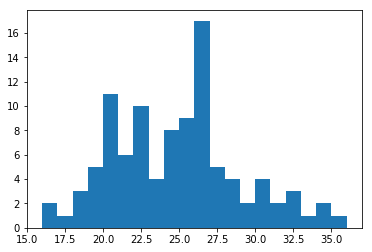

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(echantillon,
         bins=np.linspace(echantillon.min(), echantillon.max(), echantillon.max() - echantillon.min() + 1));

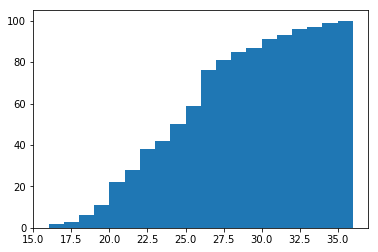

In [5]:
plt.hist(echantillon,
         bins=np.linspace(echantillon.min(), echantillon.max(), echantillon.max() - echantillon.min() + 1),
         cumulative=True);

In [6]:
#print("moyenne:", m)
#print("écart type:", sigma)

print("moyenne empirique de l'échantillon:", echantillon.mean())
print("écart type empirique de l'échantillon:", echantillon.std())

moyenne empirique de l'échantillon: 24.35
écart type empirique de l'échantillon: 4.20327253459


## Définition et test des hypothèses

## Minimize $d$

In [7]:
def dist_chi2(x, *param):
    n = x[0]
    p = x[1]
    
    dist = 0
    
    n_xi = 10 # TODO
    
    for xi in range(n_xi):
        n_ei = 0   # TODO
        n_hi = 0   # TODO
        
        dist += ((n_ei - n_hi)**2) / n_hi
    
    return dist

In [9]:
from scipy import optimize

n_slice = slice(1., 200., 1.)
p_slice = slice(0.1, 1.0, 0.1)

search_ranges = (n_slice, p_slice)

#res = optimize.brute(dist_chi2,
#                     search_ranges,
#                     #args=params,
#                     full_output=True,
#                     finish=optimize.fmin)

#print("x* =", res[0])
#print("f(x*) =", res[1])

## Références

- *Statistique et Pobabilités* de Jean-Pierre Lecoutre, 2006 Dunod, 3e édition p.154